# Arshia Yousefinezad
## 610302085
### سری سوم تمرینات یادگیری ماشین

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
data= mnist['data']
target = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.metrics import accuracy_score

import pandas as pd

acc_dict_train = {2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
acc_dict_test = {2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

perceptron = Perceptron()

# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True)

for j, dim in enumerate([2, 3, 4, 5, 6, 7, 8, 9], start=1):
    print("dim=", dim)
    train_scores = []
    test_scores = []

    # Linear Discriminant Analysis on data
    lda = LinearDiscriminantAnalysis(n_components=dim)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    X_train_lda = pd.DataFrame(X_train_lda)
    X_test_lda = pd.DataFrame(X_test_lda)

    for i in range(10):
      train_score_kfold = []
      test_score_kfold = []

      print('i= ', i)
      count = 0
      for train_index, test_index in kf.split(X_train_lda, y_train):
          print("fold=", count)
          count+=1
          X_train_fold, X_test_fold = X_train_lda.iloc[train_index], X_train_lda.iloc[test_index]
          y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]


          # Perceptron model
          perceptron.fit(X_train_fold, y_train_fold)

          # Calculate accuracy on the training fold
          y_train_pred = perceptron.predict(X_train_fold)
          train_score = accuracy_score(y_train_fold, y_train_pred)

          train_score_kfold.append(train_score)

           # Calculate accuracy on the test fold
          y_test_pred = perceptron.predict(X_test_fold)
          test_score = accuracy_score(y_test_fold, y_test_pred)

          test_score_kfold.append(test_score)

      acc_dict_train[dim].append(np.mean(train_score_kfold))
      acc_dict_test[dim].append(np.mean(test_score_kfold))





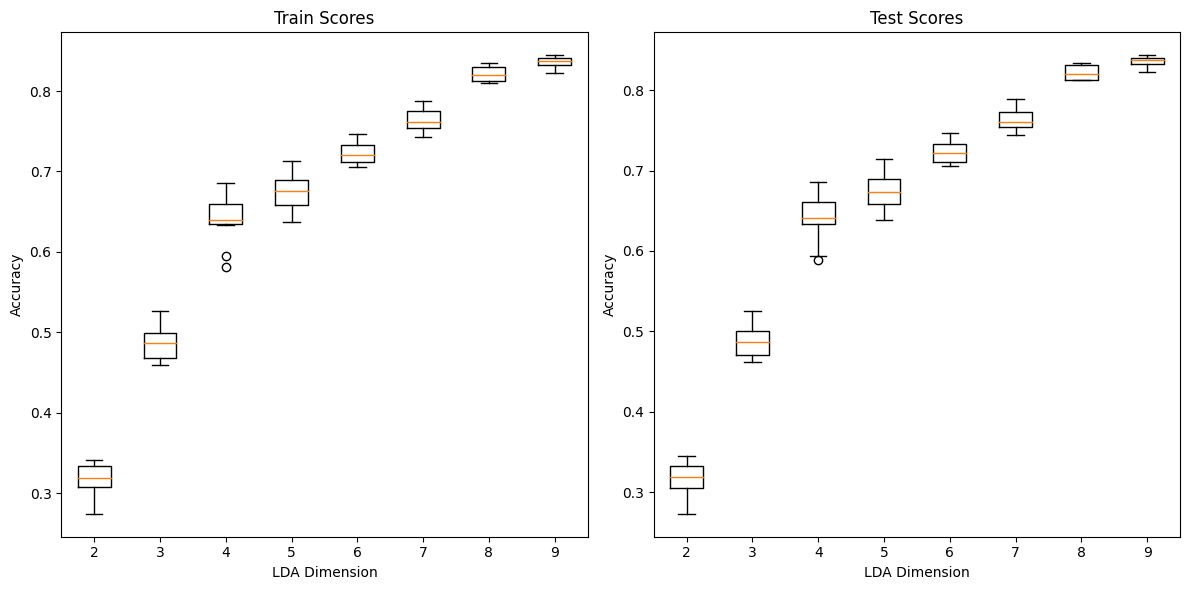

In [41]:
import matplotlib.pyplot as plt
# Create boxplots for train and test scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(acc_dict_train.values(), labels=acc_dict_train.keys())
axes[0].set_title('Train Scores')
axes[0].set_xlabel('LDA Dimension')
axes[0].set_ylabel('Accuracy')

axes[1].boxplot(acc_dict_test.values(), labels=acc_dict_test.keys())
axes[1].set_title('Test Scores')
axes[1].set_xlabel('LDA Dimension')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

## Add regulariztion on

In [44]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

perceptron = Perceptron(penalty='l1',alpha=0.0001)
perceptron.fit(X_train_lda, y_train)

# Calculate accuracy on the training fold
train_score = perceptron.score(X_train_lda, y_train)
print(train_score)

# Calculate accuracy on the test fold
test_score = perceptron.score(X_test_lda, y_test)
print(test_score)

0.8456607142857143
0.8402142857142857


## Add polynomial features

In [7]:
from sklearn.preprocessing import PolynomialFeatures



lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_lda)
X_test_poly = poly.transform(X_test_lda)

perceptron = Perceptron(penalty='l1',alpha=0.0001)
perceptron.fit(X_train_poly, y_train)

# Calculate accuracy on the training fold
train_score = perceptron.score(X_train_poly, y_train)
print(train_score)

# Calculate accuracy on the test fold
test_score = perceptron.score(X_test_poly, y_test)
print(test_score)

0.8842321428571429
0.8776428571428572


## Confusion matrix

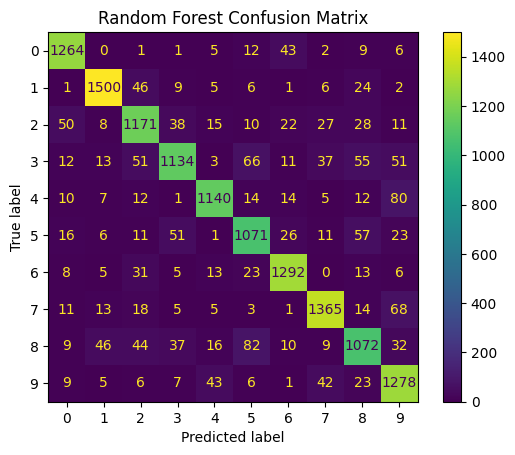

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


y_pred = perceptron.predict(X_test_poly)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=perceptron.classes_)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()